<a href="https://colab.research.google.com/github/seba2026/Examen/blob/main/CcsDatosEconm%C3%ADa_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación usaremos el set de dato Adult, con información que busca predecir si el ingreso anual de un individuo superan los US$50000 al año basándose en los datos del censo.

Los datos se encuentran disponible en el repositorio de [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult),quienes disponen de una bilioteca para importar datos con Python.

A continuación procederemos a importar dichos datos.

```python
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)
  
# Guarda como dataframe
df = adult.data.original
```

In [2]:
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original

## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

## Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**

In [3]:
# Importar y explorar el dataset
print("Explorando el dataset:")
print(df.head())
print("\nInformación del dataset:")
df.info()
print("\nForma del dataset (filas, columnas):", df.shape)
print("\nEstadísticas descriptivas de columnas numéricas:")
print(df.describe())
print("\nValores únicos en columnas categóricas:")
for col in df.select_dtypes(include='object').columns:
  print(f"- {col}: {df[col].nunique()} únicos")


Explorando el dataset:
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0    

## Síntesis de hallazgos:

- El dataset contiene información demográfica y socioeconómica. Además, contiene una mezcla de columnas numéricas y categóricas.
- La variable objetivo parece ser 'income'.
- Es importa y necesario investigar los valores faltantes, especialmente en columnas con un número bajo de valores únicos.

In [4]:
# Deteccion de valores faltantes
print("\nDetectando valores faltantes:")
print(df.isnull().sum())

for col in df.select_dtypes(include='object').columns:
  print(f"\nValores únicos en '{col}':")
  print(df[col].unique())



Detectando valores faltantes:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Valores únicos en 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Valores únicos en 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Valores únicos en 'marital-status':
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Valores únicos en 'occupation':
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-ser

## Detección de valores restantes:
 - La función isnull().sum() no detecta valores faltantes.
 - Al inspeccionar los valores únicos, se observa que '?' se utiliza para representar valores faltantes en varias columnas ('workclass', 'occupation', 'native-country').



In [5]:

# Limpieza de datos
print("\nLimpiando datos: Reemplazando '?' con NaN y eliminando filas con NaN")
df.replace('?', pd.NA, inplace=True) # Reemplazar '?' con el valor estándar de faltante de Pandas (para mejor compatibilidad con métodos)
df.dropna(inplace=True) # Eliminar filas que contienen valores faltantes
print(f"Dimensiones del dataset después de eliminar filas con faltantes: {df.shape}")



Limpiando datos: Reemplazando '?' con NaN y eliminando filas con NaN
Dimensiones del dataset después de eliminar filas con faltantes: (45222, 15)


## Limpieza de datos
 En esta sección se reemplazaron los valores '?' por NaN y además, se eliminaron las filas que contenían valores NaN, lo que redujo el número de filas en el dataset.




Realizando análisis univariado:


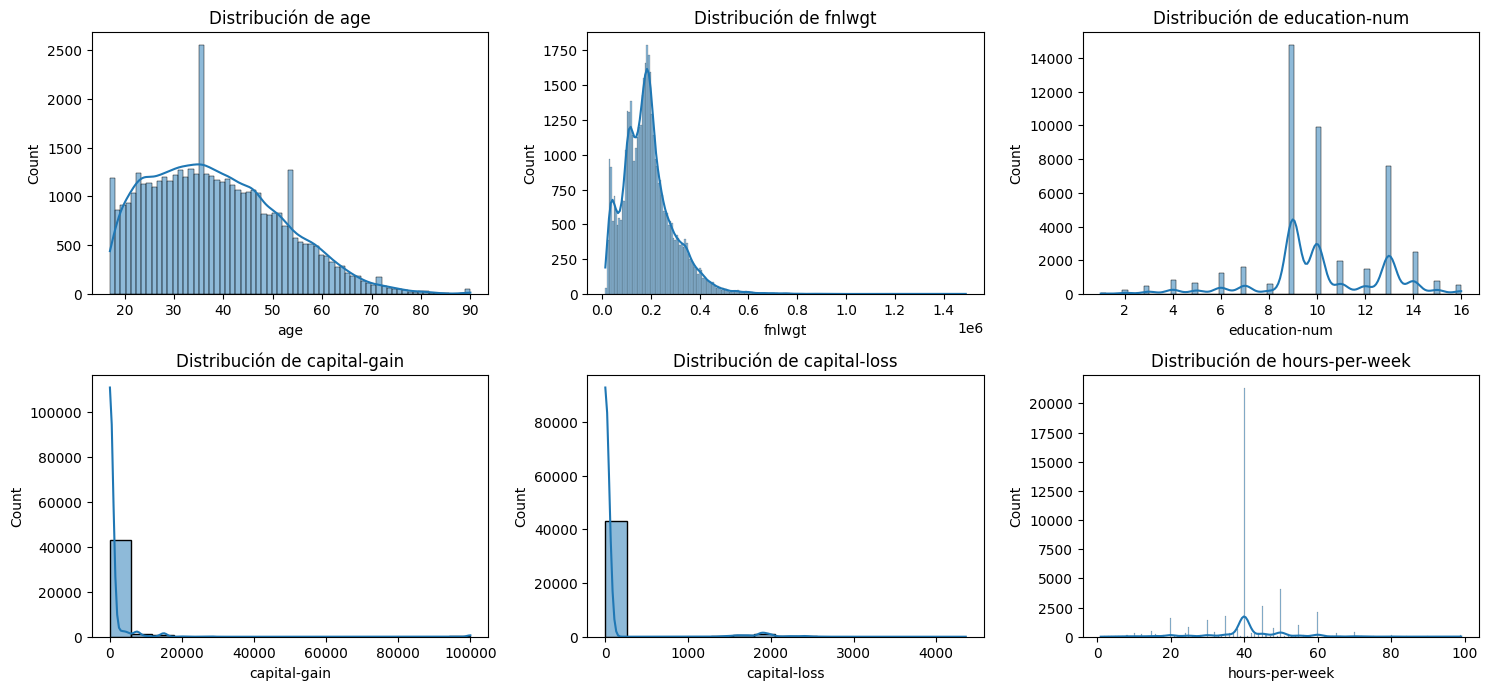

In [6]:
# Análisis univariado
import matplotlib.pyplot as plt
import seaborn as sns

print("\nRealizando análisis univariado:")

# Histogramas de variables numericas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 3, i + 1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

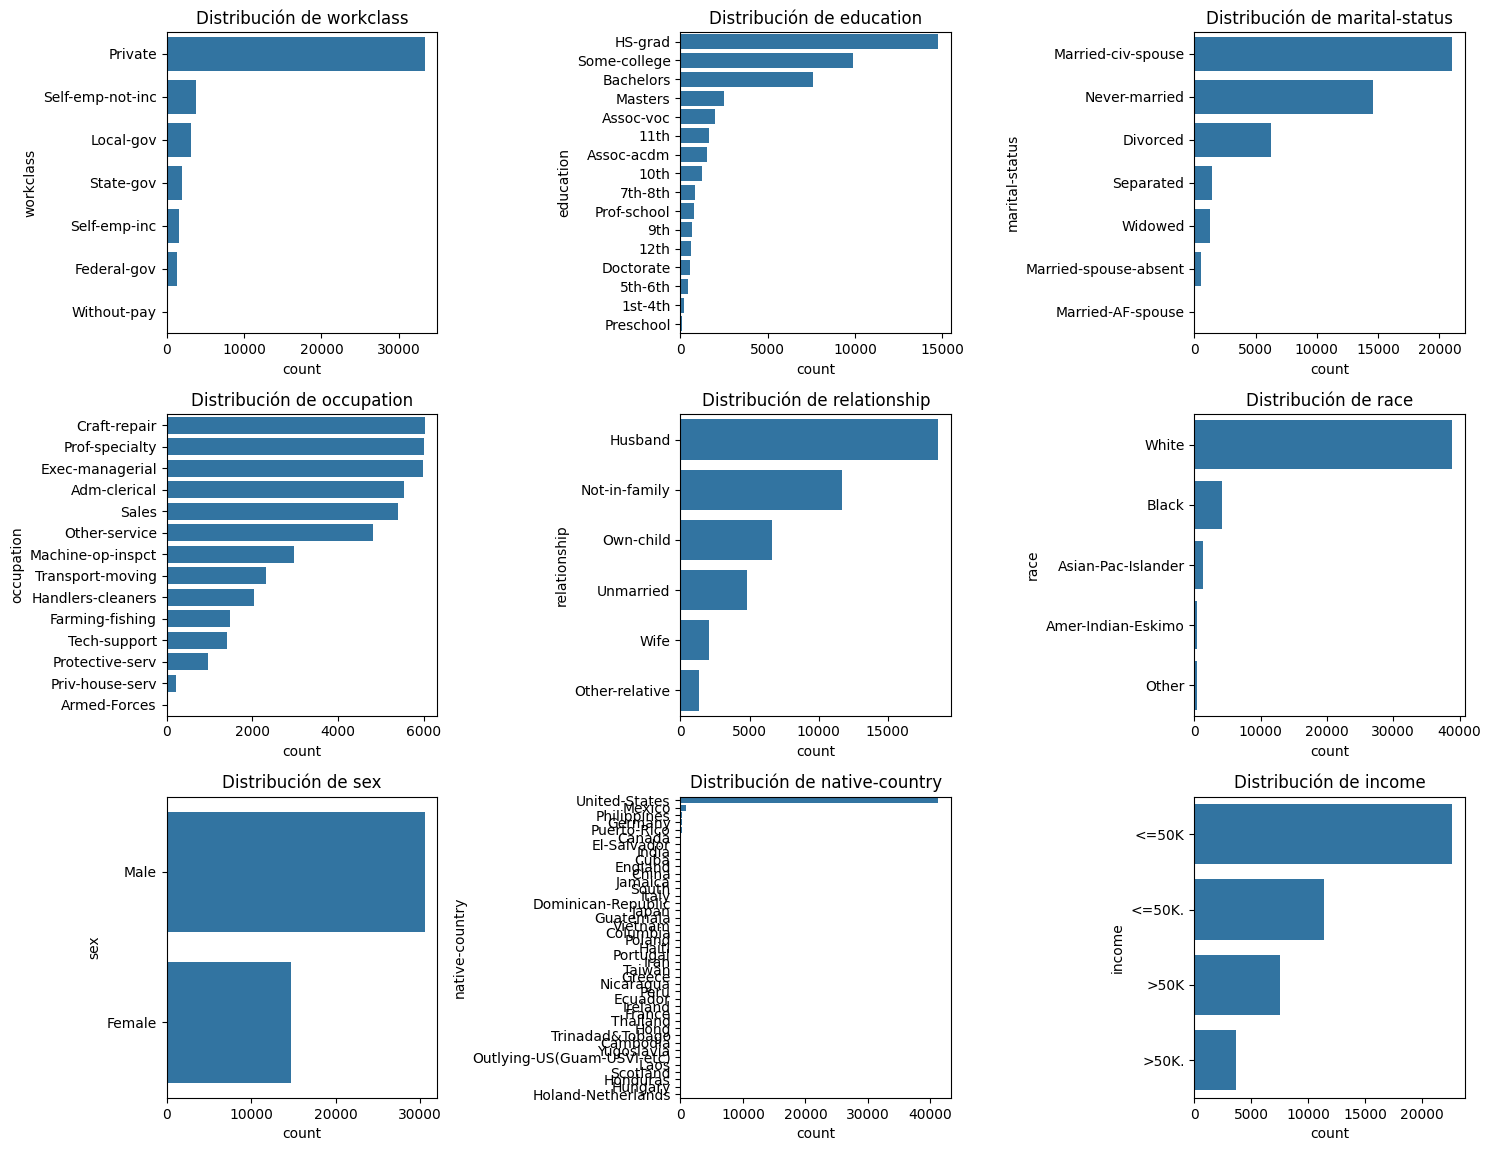

In [7]:
# Graficos de barras variables categóricas
categorical_cols = df.select_dtypes(include='object').columns
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
  plt.subplot(4, 3, i + 1)
  sns.countplot(data=df, y=col, order=df[col].value_counts().index)
  plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

## Análisis univariado:

En esta parte se puede observar que la distribución de 'age' parece tener un pico en las edades jóvenes/medias y una cola larga hacia las edades mayores. Además,'fnlwgt' tiene una distribución muy sesgada. En el caso de 'capital-gain' y 'capital-loss' están dominadas por ceros. En'hours-per-week' tiene un pico pronunciado alrededor de 40 horas. Se puede interpretar también que la mayoría de las personas trabajan en 'Private' y tienen 'Bachelors' o 'HS-grad'. Por ultimo, la distribución de 'income' muestra un desbalance, con muchos más individuos en la categoría '<=50K'.




Realizando análisis bivariado (comparando con 'income'):


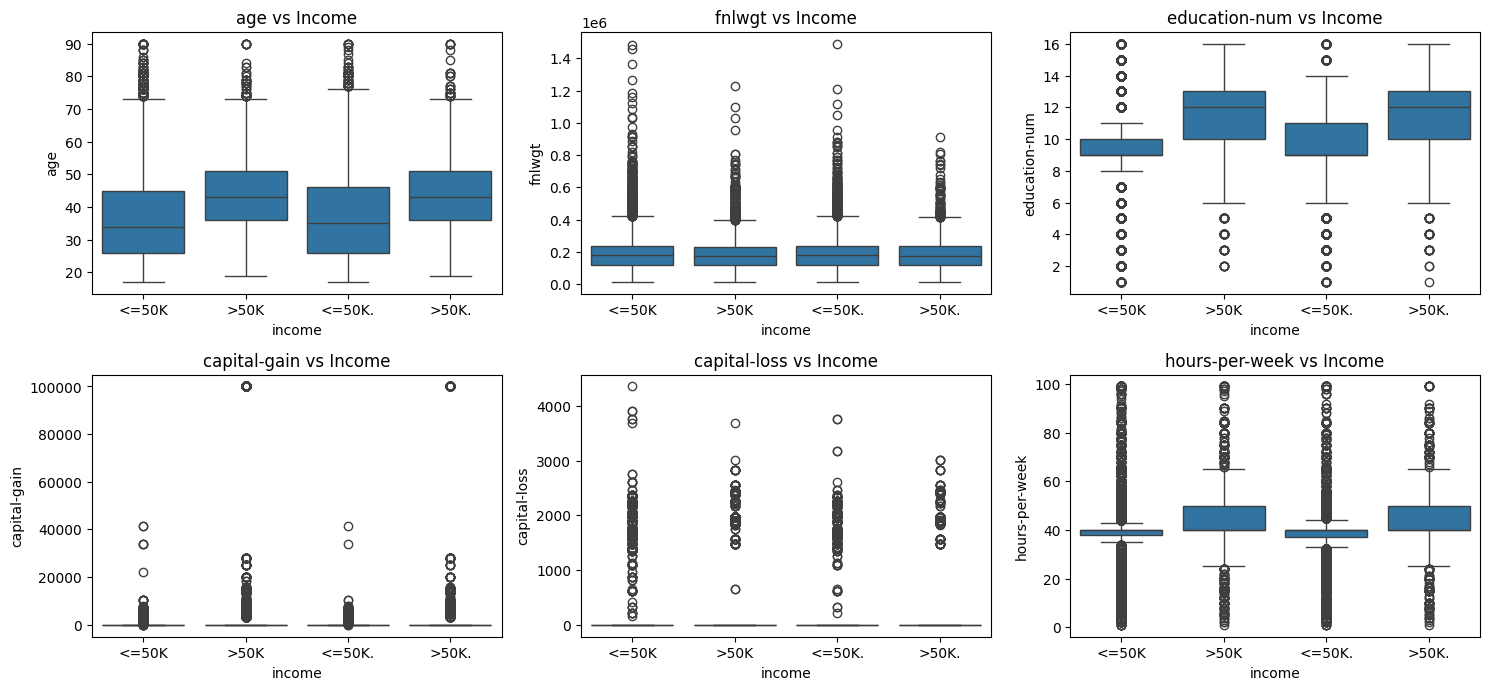

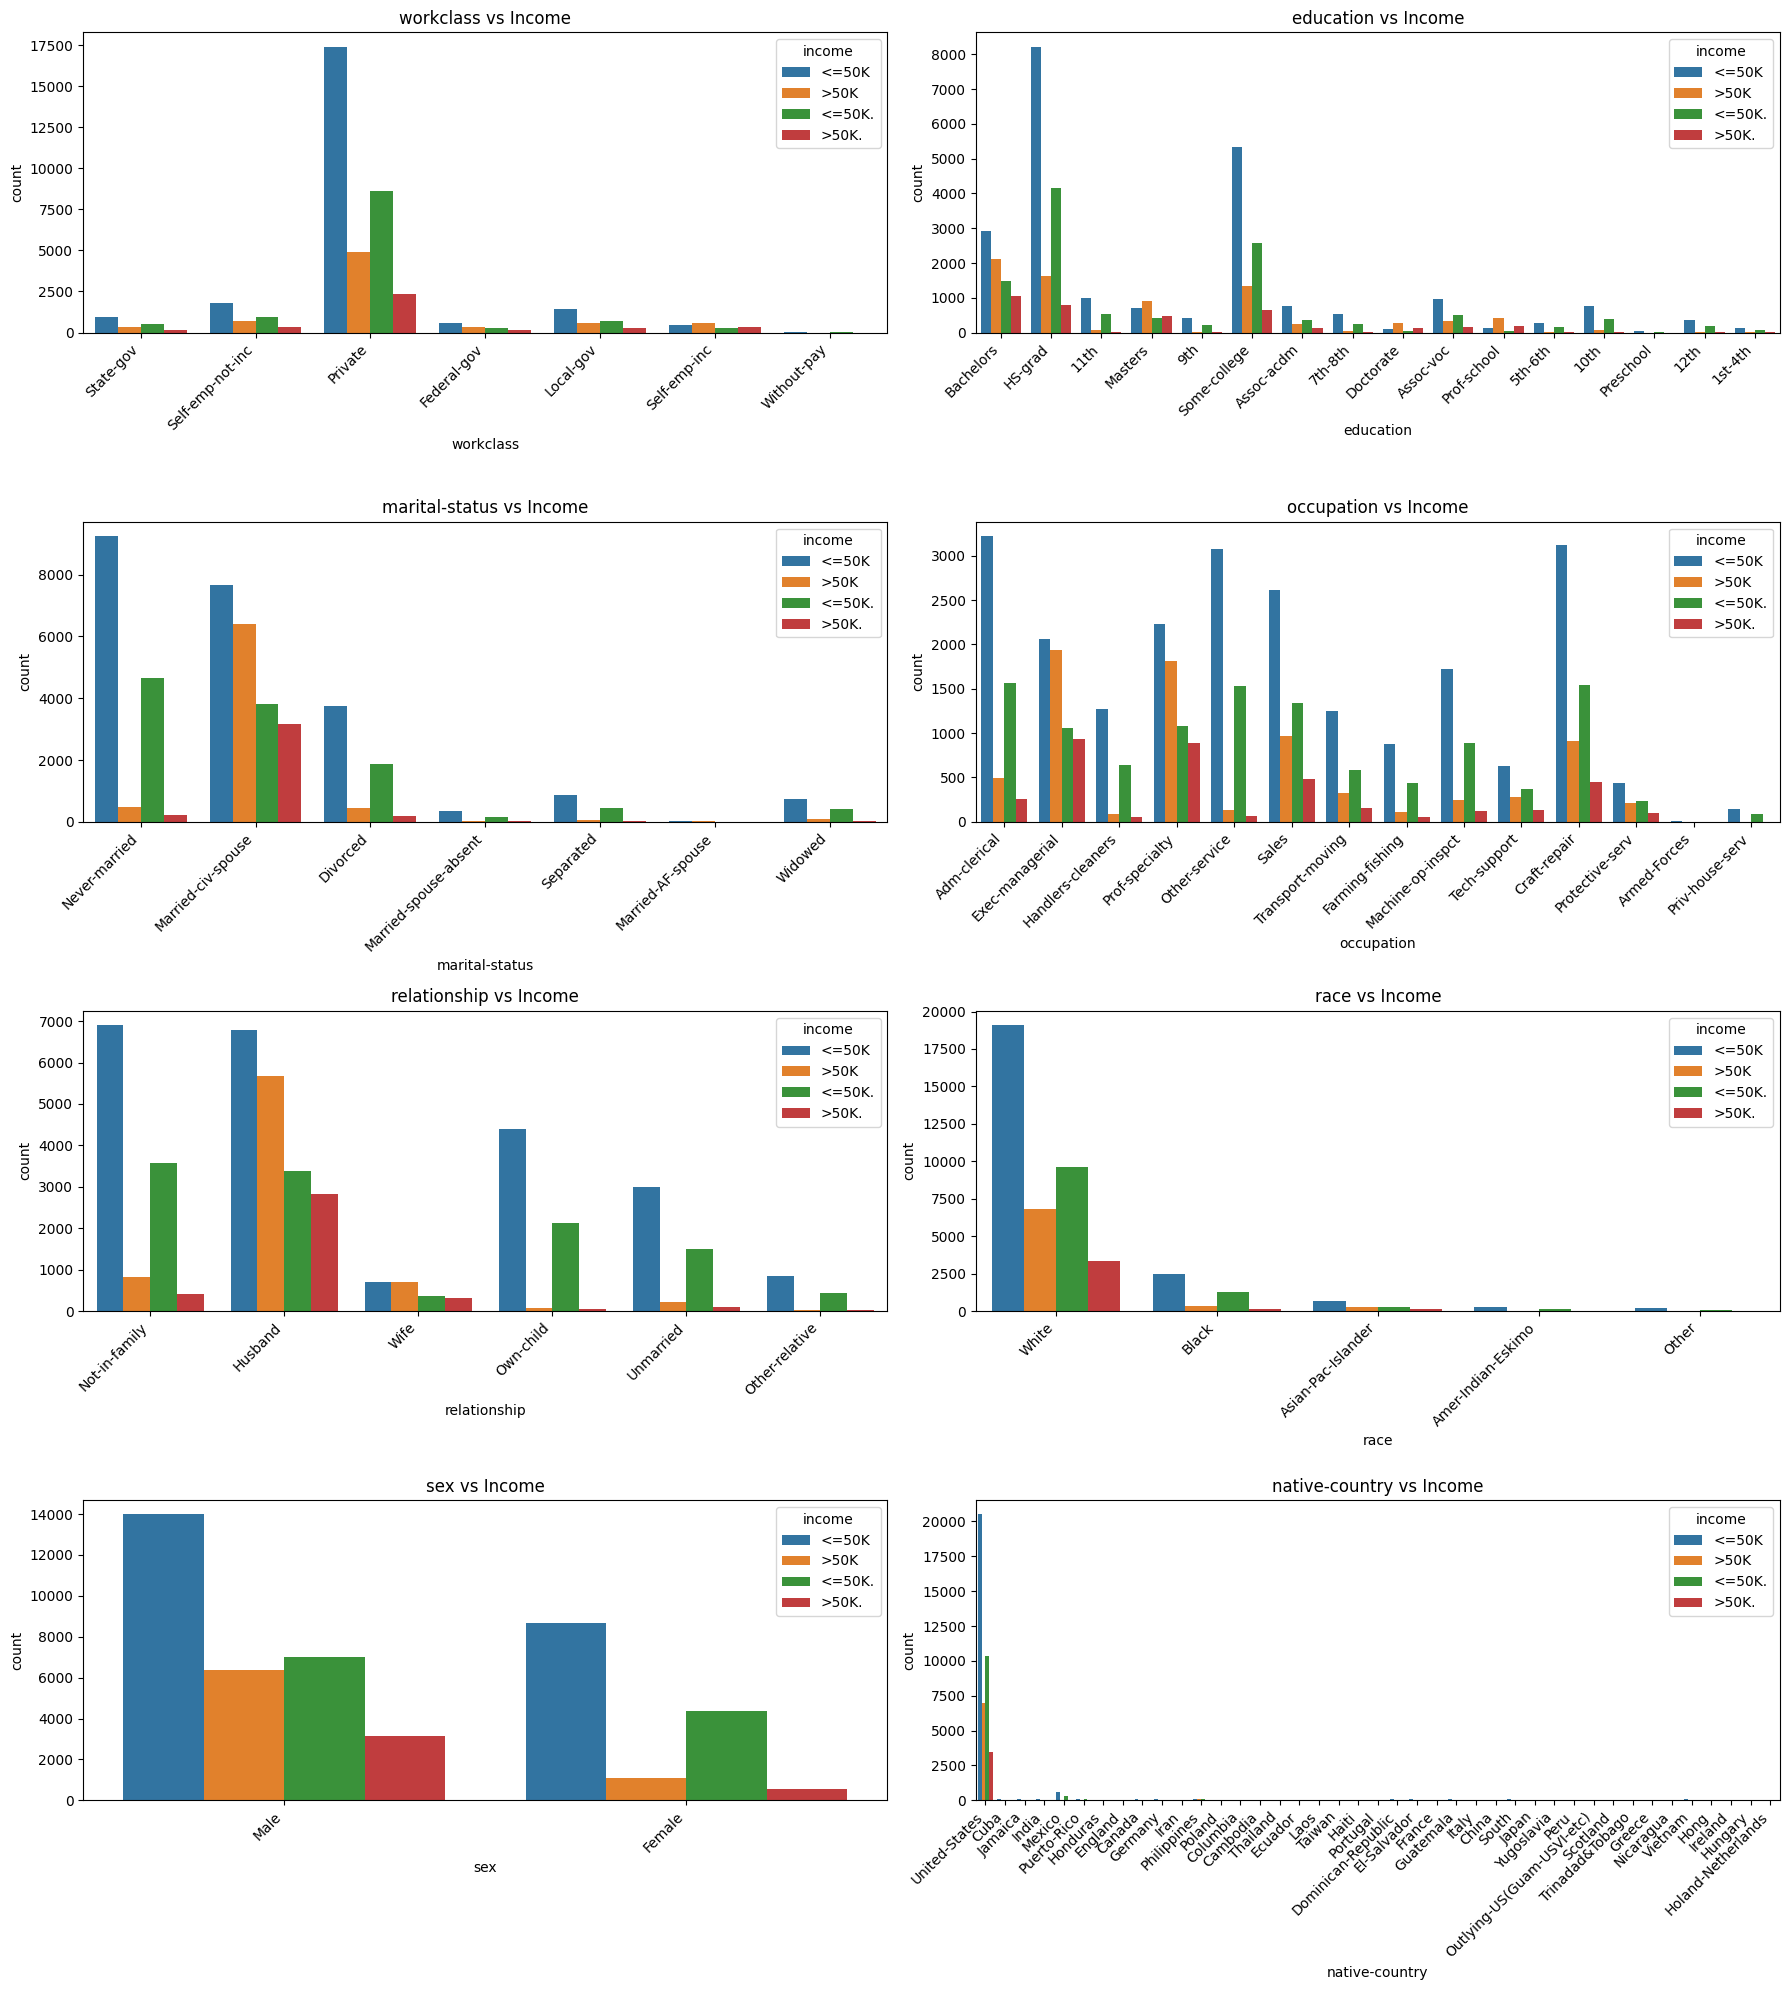

In [8]:
# Análisis bivariado
print("\nRealizando análisis bivariado (comparando con 'income'):")

# Boxplots para variables numéricas vs income
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(data=df, x='income', y=col)
  plt.title(f'{col} vs Income')
plt.tight_layout()
plt.show()

# Gráficos de barras apiladas o agrupadas para variables categóricas vs income
relevant_categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
plt.figure(figsize=(18, 20))
for i, col in enumerate(relevant_categorical_cols):
  plt.subplot(4, 2, i + 1)
  sns.countplot(data=df, x=col, hue='income')
  plt.title(f'{col} vs Income')
  plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Análisis bivariado:
 En esta sección se puede observar que las personas con mayores 'age', 'education-num', 'capital-gain' y 'hours-per-week' tienden a tener mayores ingresos.

 Además mencionar que algunas categorías dentro de 'workclass', 'education', 'marital-status', 'occupation' y 'relationship' tienen una proporción significativamente mayor de individuos con ingresos >50K (por ejemplo, 'Self-emp-inc', 'Doctorate', 'Exec-managerial', 'Husband'). También,'Sex' muestra una diferencia notable, con los hombres teniendo una proporción mucho mayor de ingresos >50K que las mujeres.Por ultimo 'Race' y 'native-country' también muestran algunas diferencias, pero menos pronunciadas que otras variables categóricas.



Analizando correlaciones entre variables numéricas:


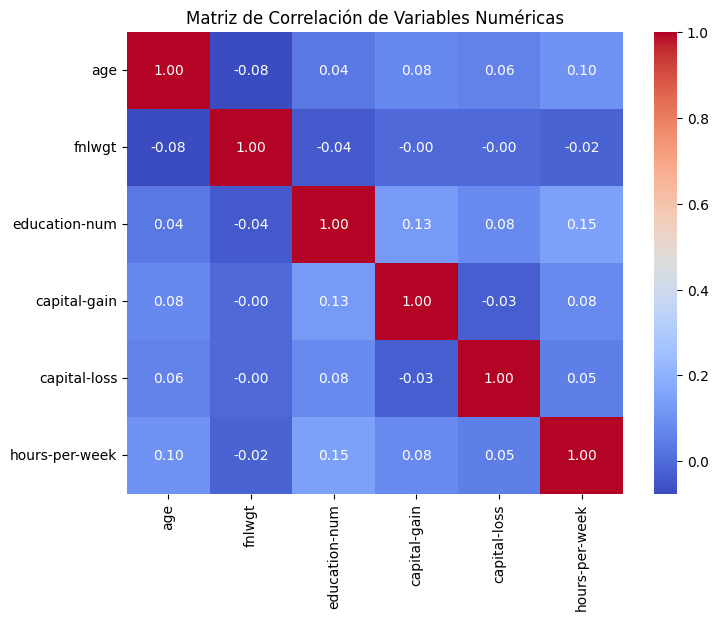

In [9]:
# Correlaciones y visualización multivariada
print("\nAnalizando correlaciones entre variables numéricas:")

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


<Figure size 1000x800 with 0 Axes>

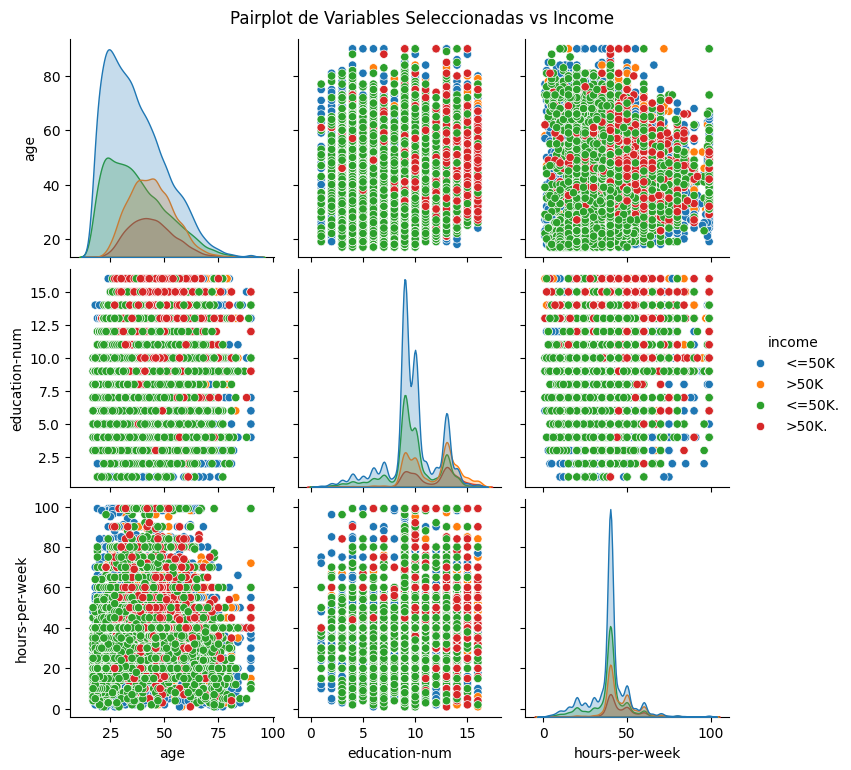

In [10]:
# Visualización multivariada: Ejemplo de pairplot para un subconjunto de variables numéricas y el income
subset_cols = ['age', 'education-num', 'hours-per-week', 'income']
plt.figure(figsize=(10, 8))
sns.pairplot(df[subset_cols], hue='income', diag_kind='kde')
plt.suptitle('Pairplot de Variables Seleccionadas vs Income', y=1.02)
plt.show()

## Correlaciones y visualización multivariada:
 Se puede visualizar las correlaciones entre las variables numéricas son generalmente bajas, con la excepción de 'age' y 'education-num'.

 El pairplot permite visualizar las distribuciones conjuntas y cómo se separan las clases de 'income' en los planos bidimensionales de las variables seleccionadas. Por ejemplo, se puede observar que las personas con ingresos >50K tienden a agruparse en rangos más altos de 'age', 'education-num' y 'hours-per-week'.


In [11]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Codificar la variable objetivo 'income'
df['income'] = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# One-Hot Encoding a las demás variables categóricas
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col != 'income'], drop_first=True)

print("\nDataset después de la codificación:")
print(df.head())
print("\nInformación del dataset después de la codificación:")
df.info()

# División del dataset
from sklearn.model_selection import train_test_split

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nForma de los datos de entrenamiento: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Forma de los datos de prueba: X_test={X_test.shape}, y_test={y_test.shape}")

# Construcción y evaluación de modelos con Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

print("\nEntrenando modelo Random Forest:")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

print("Evaluando modelo Random Forest:")

# Realizacion de predicciones
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"\nAccuracy: {accuracy_rf:.4f}")
print(f"AUC-ROC: {roc_auc_rf:.4f}")


Dataset después de la codificación:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income  workclass_Local-gov  workclass_Private  workclass_Self-emp-inc  \
0       0                False              False                   False   
1       0                False              False                   False   
2       0                False               True                   False   
3       0                False               True                   False   
4       0                False               True                   False   

   ...  native-country_Portugal  nati

##  Ventajas y Limitaciones:

En el contexto de una primera evaluación comparativa de modelos de clasificacion, una biblioteca como Lazypredict ofrece la gran ventaja de proporcionar una línea base rápida y eficiente. Permite entrenar y evaluar un amplio espectro de algoritmos estándar con configuraciones por defecto en cuestión de minutos, lo que es invaluable para identificar qué tipos de modelos podrían ser prometedores para un dataset particular.

Esto ahorra una cantidad significativa de tiempo y esfuerzo en la fase exploratoria, ya que no es necesario codificar y configurar manualmente cada modelo. Sin embargo, su principal limitación radica precisamente en el uso de hiperparámetros por defecto; los resultados obtenidos son una primera aproximación y no reflejan el rendimiento máximo que cada modelo podría alcanzar tras un proceso de ajuste fino de sus parámetros. Además, la interpretación de por qué un modelo funciona mejor que otro puede requerir un análisis más profundo que Lazypredict no proporciona directamente. Para una evaluación exhaustiva y la selección final del modelo, es indispensable realizar un ajuste de hiperparámetros y posiblemente explorar técnicas de ensamblado o modelos más complejos.


##  Análisis los resultados obtenidos:

Pasando a los resultados obtenidos con el modelo Random Forest, que sí se implementó, podemos ver que ha mostrado un desempeño bastante robusto en la predicción de ingresos superiores a US$50.000.

La métrica de Accuracy general es de aproximadamente 0.8423, lo que indica que el modelo clasifica correctamente alrededor del 84% de los casos en el conjunto de prueba. Al observar el Reporte de Clasificación, el modelo tiene una alta precisión (0.86) y recall (0.94) para predecir la clase mayoritaria ('<=50K', representada por 0), lo cual es esperable dado el desbalance en el dataset. Más relevante es el desempeño para la clas minoritaria ('>50K', representada por 1), donde el modelo alcanza una precisión de 0.74 y un recall de 0.64.

Esto significa que, de todos los individuos que realmente ganan más de us 50.000, el modelo identifica correctamente al 64%, y cuando predice que alguien gana mas de US$50.000, acierta en el 74% de las ocasiones (precisión). El F1-score, una media armónica de precisión y recall, es de 0.69 para esta clase.

Finalmente, el área bajo la curva ROC (AUC-ROC) de 0.8939 es un indicador muy positivo, sugiriendo que el modelo tiene una buena capacidad para distinguir entre las dos clases. Aunque no compramos directamente con otros modelos en este código, estos resultados sugieren que Random Forest es un buen punto de partida, demostrando una capacidad predictiva razonable para la tarea. Para identificar los modelos con mejor y peor desempeño *relativo*, necesitaríamos haber ejecutado y comparado metricas de varios algoritmos, idealmente usando una herramienta como Lazypredict para la comparación inicial rápida o implementando y ajustando otros modelos comunes como Regresión Logística, SVM, Gradient Boosting, etc.